### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Importing data

In [3]:
Q1_2021 = pd.read_csv('Q1_2021 (1).csv')
Q2_2021 = pd.read_csv('Q2_2021 (1).csv')

### Data Shape Exploration

In [4]:
Q1_2021.head()

,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Modelo,Color,Dias
0,31/03/2021 00:00,995439,1522,20,09/03/2021 00:00,30/03/2021 00:00,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,"$9,561.05","$4,113.27","$5,447.78",0.57,1,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$9,561.05",$0.00,"$4,113.27","$5,258.62",$0.00,"$3,223.98","$14,819.67","$7,337.25",143169,MMM148ED0EH603267,0,G,NaN,NaN,22.0
1,31/03/2021 00:00,995440,1522,20,09/03/2021 00:00,30/03/2021 00:00,114227,HOJALATERIA Y PINTURA,ASEGURADORA,NaN,60222,"$14,753.10","$5,880.56","$8,872.54",0.60,1,$51.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$14,702.10",$0.00,"$5,880.56",$0.00,$0.00,$0.00,"$14,753.10","$5,880.56",143169,MMM148ED0EH603267,0,G,NaN,NaN,22.0
2,31/03/2021 00:00,571394,1521,11,NaN,01/03/2021 00:00,5847,SERVICIO,INTERNA,INTERNO,59741,"-$1,711.21","-$1,711.21",$0.00,0.00,-1,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"-$1,711.21",$0.00,"-$1,711.21",$0.00,$0.00,$0.00,"-$1,711.21","-$1,711.21",60004,9BD578456GB074512,2016,M,NaN,BLANCOS,NaN
3,31/03/2021 00:00,995441,1522,20,09/03/2021 00:00,01/04/2021 00:00,53848,SERVICIO,INTERNA,INTERNO,59935,$0.00,$0.00,$0.00,0.00,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,4514,3G1MA5E21ML130621,0,G,NaN,NaN,22.0
4,31/03/2021 00:00,995442,1522,20,13/03/2021 00:00,14/04/2021 00:00,114194,HOJALATERIA Y PINTURA,ASEGURADORA,NaN,60405,"$6,512.89","$2,522.00","$3,990.89",0.61,1,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$6,512.89",$0.00,"$2,522.00","$21,287.43",$0.00,"$17,622.71","$27,800.32","$20,144.71",21456,MA6CB5CD8LT055964,0,G,NaN,NaN,18.0


In [5]:
print(f'Amount of rows and columns first quarter => {Q1_2021.shape}')
print(f'Amount of rows and columns second quarter => {Q2_2021.shape}')

Amount of rows and columns first quarter => (60061, 37)
Amount of rows and columns second quarter => (60197, 37)


> Both datasets have the same amount of columns, and almost the same a mount os rows(orders)

### Adding trimestre para hacer una sola base de datos

In [6]:
Q1_2021.insert(0, 'QPR', 'Q1')
Q2_2021.insert(0, 'QPR', 'Q2')

In [7]:
# Unir las dos dataframes 
df = pd.concat([Q1_2021, Q2_2021], axis=0)

In [8]:
df.head()

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Modelo,Color,Dias
0,Q1,31/03/2021 00:00,995439,1522,20,09/03/2021 00:00,30/03/2021 00:00,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,"$9,561.05","$4,113.27","$5,447.78",0.57,1,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$9,561.05",$0.00,"$4,113.27","$5,258.62",$0.00,"$3,223.98","$14,819.67","$7,337.25",143169,MMM148ED0EH603267,0,G,NaN,NaN,22.0
1,Q1,31/03/2021 00:00,995440,1522,20,09/03/2021 00:00,30/03/2021 00:00,114227,HOJALATERIA Y PINTURA,ASEGURADORA,NaN,60222,"$14,753.10","$5,880.56","$8,872.54",0.60,1,$51.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$14,702.10",$0.00,"$5,880.56",$0.00,$0.00,$0.00,"$14,753.10","$5,880.56",143169,MMM148ED0EH603267,0,G,NaN,NaN,22.0
2,Q1,31/03/2021 00:00,571394,1521,11,NaN,01/03/2021 00:00,5847,SERVICIO,INTERNA,INTERNO,59741,"-$1,711.21","-$1,711.21",$0.00,0.00,-1,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"-$1,711.21",$0.00,"-$1,711.21",$0.00,$0.00,$0.00,"-$1,711.21","-$1,711.21",60004,9BD578456GB074512,2016,M,NaN,BLANCOS,NaN
3,Q1,31/03/2021 00:00,995441,1522,20,09/03/2021 00:00,01/04/2021 00:00,53848,SERVICIO,INTERNA,INTERNO,59935,$0.00,$0.00,$0.00,0.00,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,4514,3G1MA5E21ML130621,0,G,NaN,NaN,22.0
4,Q1,31/03/2021 00:00,995442,1522,20,13/03/2021 00:00,14/04/2021 00:00,114194,HOJALATERIA Y PINTURA,ASEGURADORA,NaN,60405,"$6,512.89","$2,522.00","$3,990.89",0.61,1,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$6,512.89",$0.00,"$2,522.00","$21,287.43",$0.00,"$17,622.71","$27,800.32","$20,144.71",21456,MA6CB5CD8LT055964,0,G,NaN,NaN,18.0


In [9]:
df.tail()

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Modelo,Color,Dias
60192,Q2,04/04/2021 00:00,475901,1521,9,04/04/2021 00:00,05/04/2021 00:00,102698,SERVICIO,PUBLICO,CONTADO,34509,"$3,848.23","$1,275.25","$2,572.98",0.67,1,"$1,105.50",$0.00,$114.39,$147.92,$0.00,$0.00,"$2,594.81",$0.00,"$1,160.86","$1,246.60",$0.00,$787.17,"$5,094.83","$2,062.42",34837,1HGRW1844KL905654,2019,H,NaN,AZUL OBSIDIANA,0.0
60193,Q2,04/04/2021 00:00,475902,1521,9,04/04/2021 00:00,05/04/2021 00:00,102699,SERVICIO,PUBLICO,CONTADO,34497,"$2,294.98",$492.80,"$1,802.18",0.79,1,"$1,244.32",$0.00,$118.94,$145.50,$0.00,$0.00,$905.16,$0.00,$373.86,"$1,523.97",$0.00,$961.89,"$3,818.95","$1,454.69",93670,3HGRM3851EG003846,2014,H,NaN,NaN,0.0
60194,Q2,01/04/2021 00:00,1250885,1522,27,12/02/2021 00:00,18/03/2021 00:00,18430,SERVICIO,INTERNA,INTERNO,36702,$0.00,$0.00,$0.00,0.00,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,34686,3N1AB7AD7HL602467,2017,N,NaN,NaN,48.0
60195,Q2,01/04/2021 00:00,1250883,1522,27,14/11/2020 00:00,NaN,18431,HOJALATERIA Y PINTURA,INTERNA,INTERNO,33048,$0.00,$0.00,$0.00,0.00,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,2365,3N1CK3CD6JL260434,2018,N,NaN,NaN,138.0
60196,Q2,01/04/2021 00:00,1250884,1522,27,12/02/2021 00:00,18/03/2021 00:00,127,SERVICIO,INTERNA,INTERNO,36702,$0.00,$0.00,$0.00,0.00,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"-$1,117.48",$0.00,$0.00,"-$1,117.48",$0.00,34686,3N1AB7AD7HL602467,2017,N,NaN,NaN,48.0


### Some basic EDA

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
QPR,120258,2,Q2,60197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FechaFactura,120258,174,31/03/2021 00:00,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IdRegistro,120258.0,NaN,NaN,NaN,807728.475153,408508.65948,66982.0,473988.25,847069.5,1166583.75,1421942.0
Client,120258.0,NaN,NaN,NaN,1521.114604,0.728915,1520.0,1521.0,1521.0,1522.0,1522.0
Branch,120258.0,NaN,NaN,NaN,17.25595,10.006845,1.0,9.0,18.0,23.0,38.0
FechaApertura,106872,394,19/04/2021 00:00,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FechaEntrega,114339,479,30/04/2021 00:00,1291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Factura,120258.0,NaN,NaN,NaN,88072.328444,99756.136714,1.0,20240.0,50042.5,118060.75,336611.0
Taller,120258,4,SERVICIO,108440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TipoOrden,119828,4,PUBLICO,67489,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120258 entries, 0 to 60196
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   QPR                   120258 non-null  object 
 1   FechaFactura          120258 non-null  object 
 2   IdRegistro            120258 non-null  int64  
 3   Client                120258 non-null  int64  
 4   Branch                120258 non-null  int64  
 5   FechaApertura         106872 non-null  object 
 6   FechaEntrega          114339 non-null  object 
 7   Factura               120258 non-null  int64  
 8   Taller                120258 non-null  object 
 9   TipoOrden             119828 non-null  object 
 10  TipoPago              116458 non-null  object 
 11  NumeroOT              120258 non-null  int64  
 12  Venta$                120258 non-null  object 
 13  Costo$                120258 non-null  object 
 14  Utilidad$             120258 non-null  object 
 15  Margen

In [12]:
df.isnull().sum()

QPR                          0
FechaFactura                 0
IdRegistro                   0
Client                       0
Branch                       0
FechaApertura            13386
FechaEntrega              5919
Factura                      0
Taller                       0
TipoOrden                  430
TipoPago                  3800
NumeroOT                     0
Venta$                       0
Costo$                       0
Utilidad$                    0
Margen                       0
VentasNetas                  0
VentaMO$                     0
DescuentoMO$                 0
CostoMO$                     0
VentaMateriales$             0
DescuentoMateriales$         0
CostoMateriales$             0
VentaTOT$                    0
DescuentoTOT$                0
CostoTOT$                    0
VentaPartes$                 0
DescuentoPartes$             0
CostoPartes$                 0
VentaTotal$                  0
CostoTotal$                  0
Odometro                     0
Vin     

### Clean data and data types

#### Necesito cambiar los valores de las columas de pago a floats para analisis 

- Funcion para limpiar valores numericos 

In [13]:
def clean_num_values(df, columns):
    df_temp = df.copy()
    for col in columns:
        df_temp[col] = df_temp[col].str.replace('$', '').str.replace(',', '').astype(float)
        
    return df_temp

In [14]:
columns_to_clean = [col for col in df.columns if '$' in col]  # Getting columns that needs to be clean

In [15]:
columns_to_clean

['Venta$',
 'Costo$',
 'Utilidad$',
 'VentaMO$',
 'DescuentoMO$',
 'CostoMO$',
 'VentaMateriales$',
 'DescuentoMateriales$',
 'CostoMateriales$',
 'VentaTOT$',
 'DescuentoTOT$',
 'CostoTOT$',
 'VentaPartes$',
 'DescuentoPartes$',
 'CostoPartes$',
 'VentaTotal$',
 'CostoTotal$']

In [16]:
df_num_clean = clean_num_values(df, columns_to_clean)

In [17]:
df_num_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120258 entries, 0 to 60196
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   QPR                   120258 non-null  object 
 1   FechaFactura          120258 non-null  object 
 2   IdRegistro            120258 non-null  int64  
 3   Client                120258 non-null  int64  
 4   Branch                120258 non-null  int64  
 5   FechaApertura         106872 non-null  object 
 6   FechaEntrega          114339 non-null  object 
 7   Factura               120258 non-null  int64  
 8   Taller                120258 non-null  object 
 9   TipoOrden             119828 non-null  object 
 10  TipoPago              116458 non-null  object 
 11  NumeroOT              120258 non-null  int64  
 12  Venta$                120258 non-null  float64
 13  Costo$                120258 non-null  float64
 14  Utilidad$             120258 non-null  float64
 15  Margen

#### Convert data time columns

In [18]:
df_num_clean.FechaApertura = pd.to_datetime(df_num_clean.FechaApertura, format='%d/%m/%Y %H:%M')
df_num_clean.FechaFactura = pd.to_datetime(df_num_clean.FechaFactura, format='%d/%m/%Y %H:%M')
df_num_clean.FechaEntrega = pd.to_datetime(df_num_clean.FechaEntrega, format='%d/%m/%Y %H:%M')

#### Convert IdRegistro to category

In [19]:
df_num_clean.IdRegistro = df_num_clean.IdRegistro.astype('category')

In [20]:
df_num_clean[df_num_clean.IdRegistro.duplicated()]

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Modelo,Color,Dias


- Cada Id es unico

### Check VIN Column

In [21]:
df_num_clean.Vin.value_counts().sort_values(ascending=False)[:10]

Vin
19UTC2855ML900124    18
KMHC85LC9KU123862    17
3N8CP5HD4JL487564    16
1GKKN8LS1KZ251800    16
3N1CN8AE7LL818522    15
3KPA35AC2JE116164    13
KNDJP3A42J7599057    13
3MX1771871W040284    13
3G1J86CC1GS605484    13
JN8BT27T6KW107957    12
Name: count, dtype: int64

In [22]:
vin_null_fill = df_num_clean[df_num_clean.Vin.isnull()]
df_num_clean[df_num_clean.Vin.isnull()].shape

(301, 38)

In [23]:
vin_null_fill[['FechaFactura', 'IdRegistro', 'Client', 'Branch','Factura', 'Taller', 'TipoOrden','NumeroOT','Odometro', 'Vin']]

,FechaFactura,IdRegistro,Client,Branch,Factura,Taller,TipoOrden,NumeroOT,Odometro,Vin
546,2021-03-31,794177,1521,16,50423,SERVICIO,INTERNA,21414,0,NaN
798,2021-03-31,291346,1521,7,301352,SERVICIO,INTERNA,33469,0,NaN
1112,2021-03-31,1166376,1522,23,10523,SERVICIO,INTERNA,52911,0,NaN
1902,2021-03-30,794128,1521,16,11183,SERVICIO,INTERNA,21192,0,NaN
2184,2021-03-30,681053,1521,12,155627,SERVICIO,PUBLICO,45154,1,NaN
2831,2021-03-30,847362,1521,18,55971,SERVICIO,NaN,22815,0,NaN
3158,2021-03-29,847335,1521,18,55943,SERVICIO,NaN,22798,0,NaN
3402,2021-03-29,139714,1520,3,46712,HOJALATERIA Y PINTURA,INTERNA,28697,0,NaN
3599,2021-03-29,680940,1521,12,62352,SERVICIO,INTERNA,45616,0,NaN
3717,2021-03-29,794118,1521,16,50383,SERVICIO,INTERNA,21044,1,NaN


- 301 filas no tienen regristrado ViN. 

> IdRegristro son valores unicos si no hay VIN significa que El VIN no se registro. Pondre un PlaceHolder para los valores nulos en la columna VIN

In [24]:
# VIN ex. 1HGRW1844KL905654
df_num_clean.Vin.fillna('SIN-REGRISTRAR', inplace=True)

In [25]:
df_num_clean.isnull().sum()

QPR                          0
FechaFactura                 0
IdRegistro                   0
Client                       0
Branch                       0
FechaApertura            13386
FechaEntrega              5919
Factura                      0
Taller                       0
TipoOrden                  430
TipoPago                  3800
NumeroOT                     0
Venta$                       0
Costo$                       0
Utilidad$                    0
Margen                       0
VentasNetas                  0
VentaMO$                     0
DescuentoMO$                 0
CostoMO$                     0
VentaMateriales$             0
DescuentoMateriales$         0
CostoMateriales$             0
VentaTOT$                    0
DescuentoTOT$                0
CostoTOT$                    0
VentaPartes$                 0
DescuentoPartes$             0
CostoPartes$                 0
VentaTotal$                  0
CostoTotal$                  0
Odometro                     0
Vin     

### Fill Null for Dates columns

In [26]:
df_num_clean.head()

,QPR,FechaFactura,IdRegistro,Client,Branch,FechaApertura,FechaEntrega,Factura,Taller,TipoOrden,TipoPago,NumeroOT,Venta$,Costo$,Utilidad$,Margen,VentasNetas,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$,Odometro,Vin,Ano,Marca,Modelo,Color,Dias
0,Q1,2021-03-31,995439,1522,20,2021-03-09,2021-03-30,114208,HOJALATERIA Y PINTURA,PUBLICO,CONTADO,60222,9561.05,4113.27,5447.78,0.57,1,0.0,0.0,0.0,0.0,0.0,0.0,9561.05,0.0,4113.27,5258.62,0.0,3223.98,14819.67,7337.25,143169,MMM148ED0EH603267,0,G,NaN,NaN,22.0
1,Q1,2021-03-31,995440,1522,20,2021-03-09,2021-03-30,114227,HOJALATERIA Y PINTURA,ASEGURADORA,NaN,60222,14753.10,5880.56,8872.54,0.60,1,51.0,0.0,0.0,0.0,0.0,0.0,14702.10,0.0,5880.56,0.00,0.0,0.00,14753.10,5880.56,143169,MMM148ED0EH603267,0,G,NaN,NaN,22.0
2,Q1,2021-03-31,571394,1521,11,NaT,2021-03-01,5847,SERVICIO,INTERNA,INTERNO,59741,-1711.21,-1711.21,0.00,0.00,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1711.21,0.0,-1711.21,0.00,0.0,0.00,-1711.21,-1711.21,60004,9BD578456GB074512,2016,M,NaN,BLANCOS,NaN
3,Q1,2021-03-31,995441,1522,20,2021-03-09,2021-04-01,53848,SERVICIO,INTERNA,INTERNO,59935,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,4514,3G1MA5E21ML130621,0,G,NaN,NaN,22.0
4,Q1,2021-03-31,995442,1522,20,2021-03-13,2021-04-14,114194,HOJALATERIA Y PINTURA,ASEGURADORA,NaN,60405,6512.89,2522.00,3990.89,0.61,1,0.0,0.0,0.0,0.0,0.0,0.0,6512.89,0.0,2522.00,21287.43,0.0,17622.71,27800.32,20144.71,21456,MA6CB5CD8LT055964,0,G,NaN,NaN,18.0


In [27]:
# Use boolean indexing to update values in FechaApertura y FechaEntrega where it is null using FechaFactura as the replacement. 
df_num_clean['FechaApertura'] = df_num_clean.apply(lambda row: row['FechaFactura'] 
                                                    if pd.isnull(row['FechaApertura']) 
                                                    else row['FechaApertura'], axis=1
                                                )


In [28]:
df_num_clean['FechaEntrega'] = df_num_clean.apply(lambda row: row['FechaFactura'] 
                                                    if pd.isnull(row['FechaEntrega']) 
                                                    else row['FechaEntrega'], axis=1
                                                )

In [29]:
df_num_clean.isnull().sum()

QPR                          0
FechaFactura                 0
IdRegistro                   0
Client                       0
Branch                       0
FechaApertura                0
FechaEntrega                 0
Factura                      0
Taller                       0
TipoOrden                  430
TipoPago                  3800
NumeroOT                     0
Venta$                       0
Costo$                       0
Utilidad$                    0
Margen                       0
VentasNetas                  0
VentaMO$                     0
DescuentoMO$                 0
CostoMO$                     0
VentaMateriales$             0
DescuentoMateriales$         0
CostoMateriales$             0
VentaTOT$                    0
DescuentoTOT$                0
CostoTOT$                    0
VentaPartes$                 0
DescuentoPartes$             0
CostoPartes$                 0
VentaTotal$                  0
CostoTotal$                  0
Odometro                     0
Vin     

> Null values en Color se sustutiara por 'No-Regristrado', la columna 'Dias' con al numero 0. La columna 'Modelo' se borrara por no tener ningun valor associado. 

In [30]:
# Fill null values for the Color column
df_num_clean.Color.fillna('NO-REGRISTRADO',inplace=True)
# Fill null values for Dias column
df_num_clean.Dias.fillna(0, inplace=True)
# Dropping the column modelo. 
df_num_clean.drop(columns='Modelo', inplace=True)

# Converting Ano to categorical 
df_num_clean.Ano = df_num_clean.Ano.astype('category')

In [31]:
df_num_clean[['TipoOrden', 'TipoPago']].isnull().sum()

TipoOrden     430
TipoPago     3800
dtype: int64

#### TipoOrden y TipoPago

In [32]:
df_num_clean[df_num_clean.isnull().any(axis=1)]['TipoOrden'].value_counts()

TipoOrden
ASEGURADORA    3370
Name: count, dtype: int64

> Todos los valores nulos en la columna de TipoOrden son the Aseguradoras. Necesito saber como pagan 

In [33]:
df_num_clean.groupby('TipoOrden')['TipoPago'].unique()

TipoOrden
ASEGURADORA    [nan, CREDITO, CONTADO]
GARANTIA                     [CREDITO]
INTERNA                      [INTERNO]
PUBLICO             [CONTADO, CREDITO]
Name: TipoPago, dtype: object

In [34]:
df_num_clean.groupby(['TipoOrden','TipoPago'])['TipoPago'].count()

TipoOrden    TipoPago
ASEGURADORA  CONTADO       107
             CREDITO      2765
GARANTIA     CREDITO     12710
INTERNA      INTERNO     33387
PUBLICO      CONTADO     62815
             CREDITO      4674
Name: TipoPago, dtype: int64

In [35]:
107/2765*100

3.8698010849909585

> Menos del 4% de las veces las aseguradoras pagaron al contado asi que fill null con 'CREDITO' en la fila donde el TipoOrden sea ASEGURADORA y TipoPago sea null

In [36]:
df_num_clean['TipoPago'] = df_num_clean.apply(lambda row: 'CREDITO' if row['TipoOrden'] == 'ASEGURADORA' and pd.isnull(row['TipoPago']) else row['TipoPago'], axis=1)

> Finalmente quedan null values donde TipoOrden y TipoPago son nulls. Fill con 'OTRO' nueva categoria que se puede cambiar luego

In [37]:
df_num_clean[['TipoOrden', 'TipoPago']].isnull().sum()

TipoOrden    430
TipoPago     430
dtype: int64

In [38]:
df_num_clean.TipoOrden.fillna('OTRO', inplace=True)
df_num_clean.TipoPago.fillna('OTRO', inplace=True)

In [39]:
df_num_clean.isnull().sum().sum()

0

- No nul values, data listo para analisys

In [40]:
df_num_clean.to_csv('clean_data.csv', index=False)

## Analysis

In [41]:
# Function to get summary stats
def get_summary_stats_by_columns(df):
    column_name = df.columns
    new_df = pd.DataFrame(index=['Data type', 'Min', '25%', '50%', '75%','Max', 'Mean', 'Median', 'Mode', 'Unique Values Num', 'STD', 'Skewness', 'Kurtosis', 'Count'])
    for col in column_name:
        if pd.api.types.is_numeric_dtype(df[col]):
            new_df[col] = [df[col].dtype, df[col].min(), df[col].quantile(.25), df[col].quantile(.5), df[col].quantile(.75),df[col].max(), df[col].mean(), df[col].median(),
                                df[col].mode()[0], df[col].nunique(), df[col].std(), df[col].skew(), df[col].kurt() , df[col].count()]
    return new_df

In [42]:
get_summary_stats_by_columns(df_num_clean[columns_to_clean])

,Venta$,Costo$,Utilidad$,VentaMO$,DescuentoMO$,CostoMO$,VentaMateriales$,DescuentoMateriales$,CostoMateriales$,VentaTOT$,DescuentoTOT$,CostoTOT$,VentaPartes$,DescuentoPartes$,CostoPartes$,VentaTotal$,CostoTotal$
Data type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Min,-66405.73,-71596.0,-42236.59,-42238.35,-1500.0,-6866.34,-47185.56,-15.0,-52.45,-54041.73,-64.0,-71596.0,-269648.34,-38920.0,-230127.27,-269648.34,-230127.27
25%,173.3625,17.43,106.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.0,80.915
50%,772.2,75.52,645.31,580.25,0.0,47.72,0.0,0.0,0.0,0.0,0.0,0.0,813.995,0.0,498.1,1928.44,723.235
75%,1837.115,306.8225,1463.655,1216.72,0.0,112.7375,0.0,0.0,0.0,52.1,0.0,26.05,1872.31,0.0,1120.605,3793.1,1555.275
Max,293165.94,120839.98,172325.96,61475.58,5511.0,37544.9,47185.56,63.0,4483.16,252163.44,2097.0,118000.0,449927.29,89627.0,354821.28,449927.29,356465.52
Mean,1509.822201,354.525347,1148.641459,1022.71091,3.696619,114.504939,27.879502,0.010444,0.7726,463.035951,0.0971,239.247808,2205.296406,29.908397,1472.029735,3685.21021,1826.555082
Median,772.2,75.52,645.31,580.25,0.0,47.72,0.0,0.0,0.0,0.0,0.0,0.0,813.995,0.0,498.1,1928.44,723.235
Mode,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unique Values Num,38795,34428,52296,24174,531,22093,4277,25,864,9279,50,6671,39091,1510,43732,45885,64566


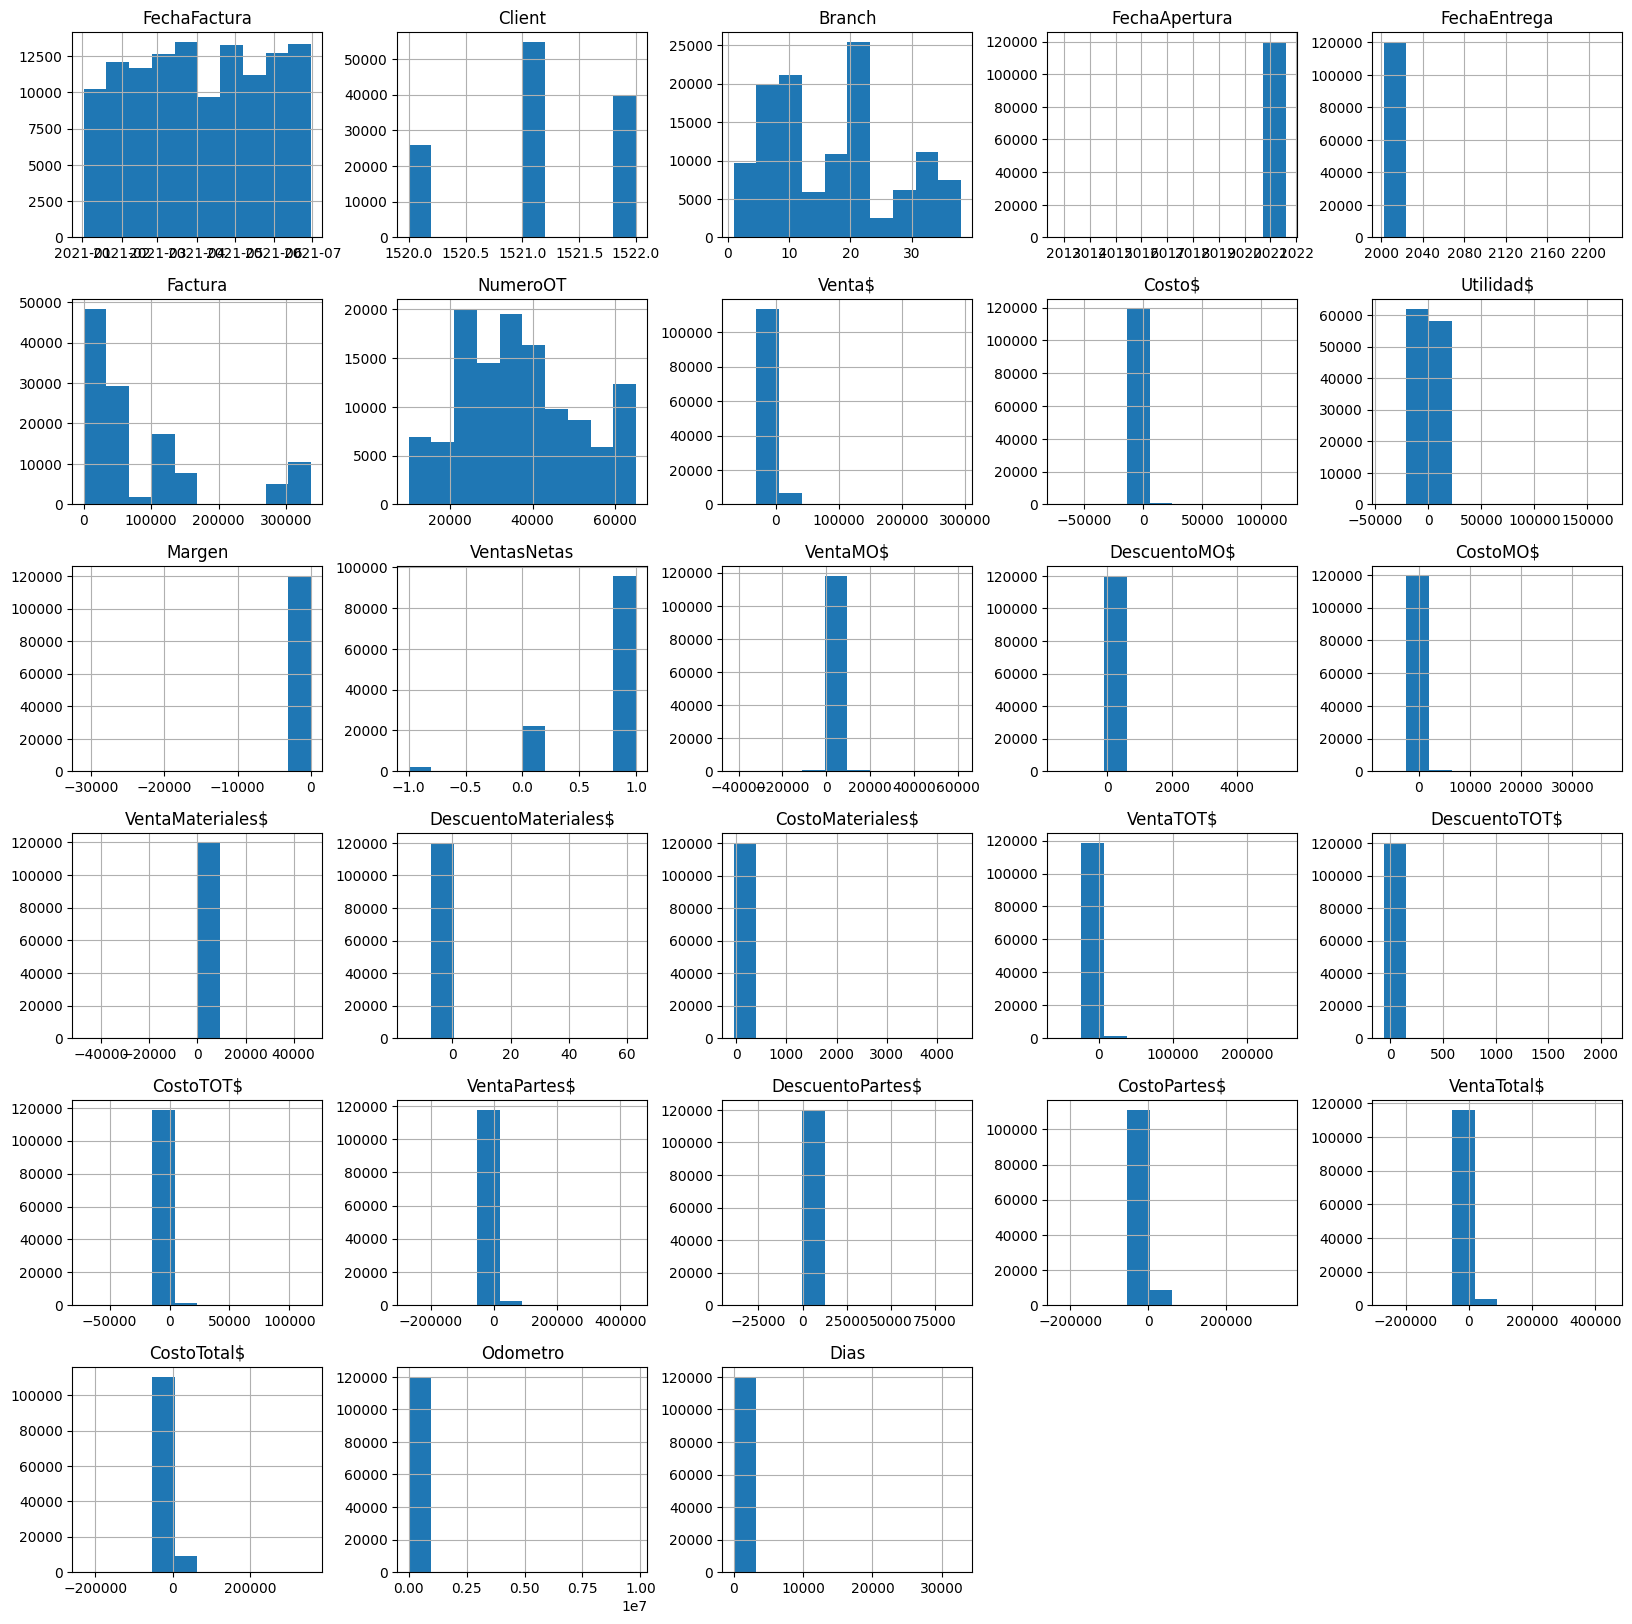

In [43]:
df_num_clean.hist(figsize=(20,20));

In [44]:
df_num_clean.describe(exclude='number')

,QPR,FechaFactura,IdRegistro,FechaApertura,FechaEntrega,Taller,TipoOrden,TipoPago,Vin,Ano,Marca,Color
count,120258,120258,120258.0,120258,120258,120258,120258,120258,120258,120258.0,120258,120258
unique,2,NaN,120258.0,NaN,NaN,4,5,4,73880,41.0,25,1404
top,Q2,NaN,66982.0,NaN,NaN,SERVICIO,PUBLICO,CONTADO,SIN-REGRISTRAR,2020.0,H,NO-REGRISTRADO
freq,60197,NaN,1.0,NaN,NaN,108440,67489,62922,301,19316.0,24621,21237
mean,NaN,2021-04-03 19:36:54.099685888,NaN,2021-03-28 05:44:11.998203904,2021-04-04 17:47:19.515042560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2021-01-02 00:00:00,NaN,2012-10-19 00:00:00,2002-04-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2021-02-19 00:00:00,NaN,2021-02-13 00:00:00,2021-02-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2021-04-05 00:00:00,NaN,2021-03-29 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2021-05-19 00:00:00,NaN,2021-05-15 00:00:00,2021-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2021-06-30 00:00:00,NaN,2021-08-09 00:00:00,2221-06-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
cat_column_list = #

12